# Advanced Statistics For Physics - Fifth assignment

* **Student:** Faorlin Tommaso
* **ID:** 2021857
* **Course:** Physics of Data

In [2]:
options(tidyverse.quiet = TRUE)
library(gridExtra)
library(tidyverse)

## Exercise 1 

### A

If I take one person from the set there is a probability of $p$ that this has read the journal and a probability of $q=1-p$ that it has not. Therefore, taking a sample of $n$ people from the target audience, the number of them that has read the journal follows a binomial distribution with parameters $n$ and $p$. For $y$, the number of people that have seen the last issue of the journal I would assume a **binomial distrubution**.

### B
Assuming a uniform prior, the posterior probability will be proporitonal to the likelihood up to the evidence (normalization constant).

### C

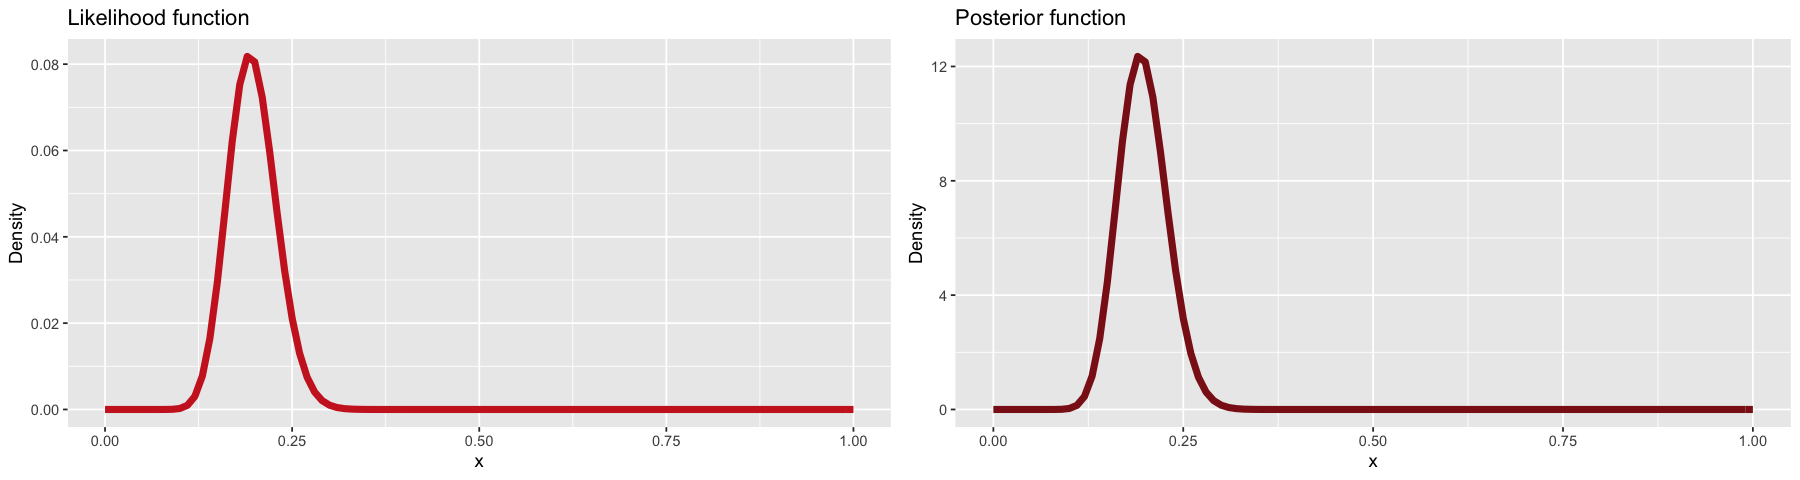

In [3]:
x <- seq(0,1,0.01)

f <- function(x){
    #assuming a uniform prior
    return(dbinom(29,150,x)*dunif(x))
}

options(repr.plot.width=15, repr.plot.height=4)
ex1 <- data.frame(x=x, like=dbinom(29,150,x), post=(f(x)/integrate(f, lower=0, upper=1)$value))
p1 <- ggplot(ex1) + geom_line(aes(x=x, y=like),colour='firebrick3', size=2)+ggtitle('Likelihood function')+labs(x='x', y='Density')
p2 <- ggplot(ex1) + geom_line(aes(x=x, y=post),colour='firebrick4', size=2)+ggtitle('Posterior function')+labs(x='x', y='Density')

grid.arrange(p1,p2,ncol=2,nrow=1)

## Exercise 2

### A 

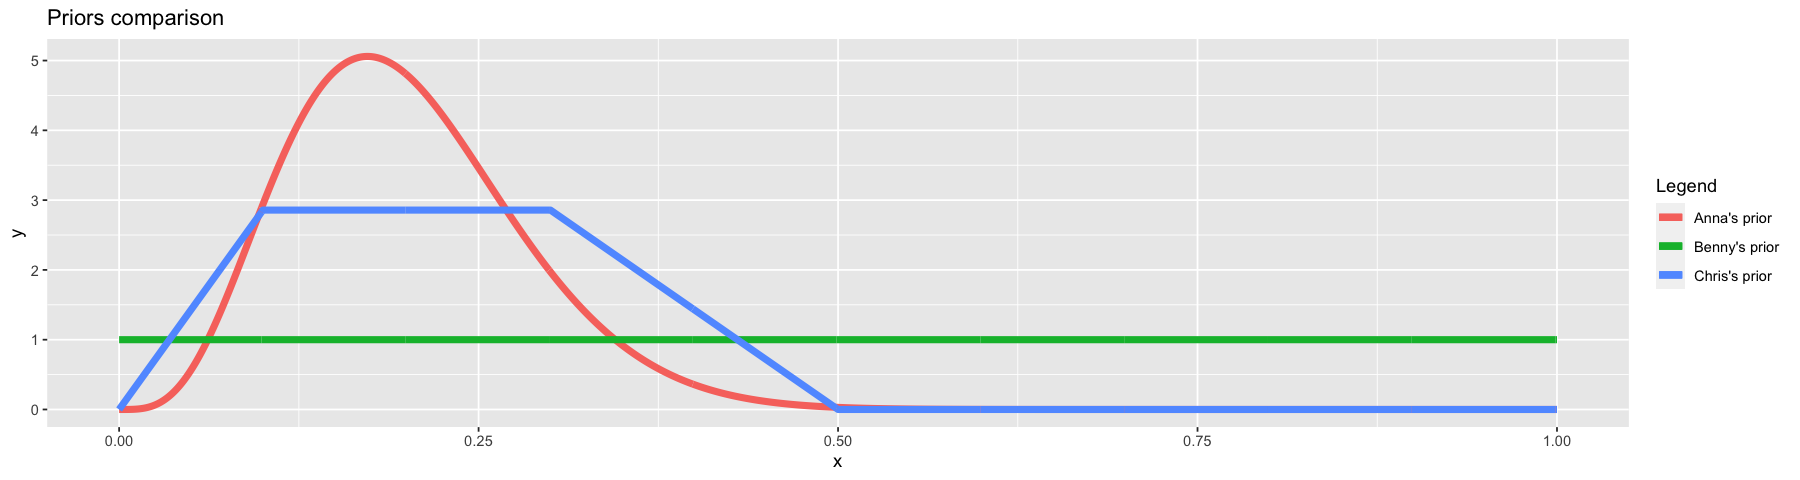

In [28]:
x <- seq(0,1,0.001)
mu <- 0.2
var <- 0.08^2

alpha <- ((1-mu)/var-1/mu)*mu^2
beta <- alpha*(1/mu-1)

#Chris's prior
trapez <- function(x){
    ifelse(0<=x&x<0.1,20*x,
           ifelse(0.1<=x & x<0.3,2,
                  ifelse(0.3<=x&x<0.5,5-10*x,0)))
}

trapez.post <- function(x){
    return((trapez(x)/0.7)*dbinom(26,100,x))
}

beta.post <- function(x){
    return(dbeta(x, alpha, beta)*dbinom(26,100,x))
}

unif.post <- function(x){
    return(dunif(x)*dbinom(26,100,x))
}

priors<-data.frame(x.axis=x,
                   anna.prior=dbeta(x, alpha, beta),
                   benny.prior=dunif(x),
                   chris.prior=trapez(x)/0.7)
                   chris.post=trapez.post(x)/integrate(trapez.post,lower=0,upper=1)$value

posteriors<-data.frame(x.axis=x,
                       anna.post=beta.post(x)/integrate(beta.post,lower=0,upper=1)$value,
                       benny.post=unif.post(x)/integrate(unif.post,lower=0,upper=1)$value,
                       chris.post=trapez.post(x)/integrate(trapez.post,lower=0,upper=1)$value
                       )    

options(repr.plot.width=15, repr.plot.height=4)

ggplot(priors)+
    geom_line(aes(x=x.axis, y=anna.prior,colour='Anna\'s prior'), size=2)+
    geom_line(aes(x=x.axis, y=benny.prior,colour='Benny\'s prior'), size=2)+
    geom_line(aes(x=x.axis, y=chris.prior,colour='Chris\'s prior'), size=2)+
    ggtitle('Priors comparison')+
    labs(x='x', y='y', colour='Legend')

### B

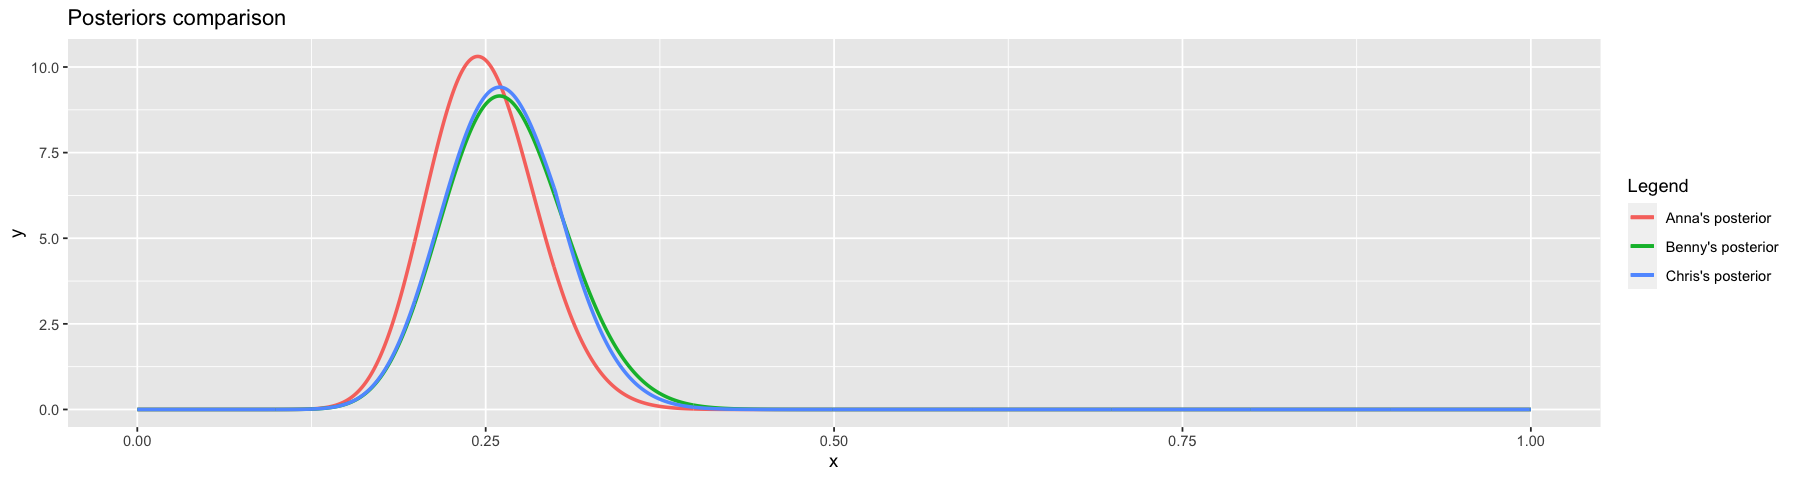

In [29]:
options(repr.plot.width=15, repr.plot.height=4)

samples <- length(posteriors$anna.post)

anna.mp.value <- which.max(posteriors$anna.post)*(1/length(posteriors$anna.post))
benny.mp.value <- which.max(posteriors$benny.post)*(1/length(posteriors$benny.post))
chris.mp.value <- which.max(posteriors$chris.post)*(1/length(posteriors$chris.post))

ggplot(posteriors)+
    geom_line(aes(x=x.axis, y=anna.post,colour='Anna\'s posterior'), size=1)+
    geom_line(aes(x=x.axis, y=benny.post,colour='Benny\'s posterior'), size=1)+
    geom_line(aes(x=x.axis, y=chris.post, colour='Chris\'s posterior'), size=1)+
    ggtitle('Posteriors comparison')+
    labs(x='x', y='y', colour='Legend')

### C

We now look for the two values $x_1$ and $x_2$ for which the area of the posterior is equal to 95%.

In [30]:
credibility.95 <- function(cumulative.area, cl=0.95){
    a = 1-cl
    for (i in 1:length(cumulative.area-1)){
        prob <- seq(from=0, by=1/1000, length.out=1000)
        #looking for the point at which we overcome the first two quantiles
        if (cumulative.area[i+1]>=a/2&cumulative.area[i]<=a/2){
            x1 <- round((prob[i+1]+prob[i])/2,4)
            }
        if (cumulative.area[i+1]>=(cl+a/2)&cumulative.area[i]<=(cl+a/2)){
            x2 <- round((prob[i+1]+prob[i])/2,4)
        }
    }
    return(c(x1,x2))
}

anna.area  <- (1/length(posteriors$anna.post ))*cumsum(posteriors$anna.post )
benny.area <- (1/length(posteriors$benny.post))*cumsum(posteriors$benny.post)
chris.area <- (1/length(posteriors$chris.post))*cumsum(posteriors$chris.post)

print(paste('Most probable value from Anna analysis:', round(anna.mp.value,3)))
print(paste('Most probable value from Benny analysis:', round(benny.mp.value,3)))
print(paste('Most probable value from Chris analysis:', round(chris.mp.value,3)))
print('=========================================================')
print(paste('95% credibility interval for Anna analysis:',paste0('[',credibility.95(anna.area)[1],',',credibility.95(anna.area)[2],']')))
print(paste('95% credibility interval for Anna analysis:',paste0('[',credibility.95(benny.area)[1],',',credibility.95(benny.area)[2],']')))
print(paste('95% credibility interval for Anna analysis:',paste0('[',credibility.95(chris.area)[1],',',credibility.95(chris.area)[2],']')))

[1] "Most probable value from Anna analysis: 0.245"
[1] "Most probable value from Benny analysis: 0.261"
[1] "Most probable value from Chris analysis: 0.261"
[1] "========================================================="
[1] "95% credibility interval for Anna analysis: [0.1765,0.3285]"
[1] "95% credibility interval for Anna analysis: [0.1835,0.3545]"
[1] "95% credibility interval for Anna analysis: [0.1835,0.3465]"


### B-bis

The observations provided in the exercise, on a sample of 100 citizens, are so many that we are not able to see differences on the resulting posteriors, despite some small changes. For the sake of curiosity, I decided to repeat the calculations considering less data, and see how when data is scarce, prior knowledge is preponderant. In particular, in the case of Benny, the variance is broader than before since she had no a priori knowledge on the problem. It is also interesting to see how the shape of the trapeziodal prior of Chris emerges when we have less observations.

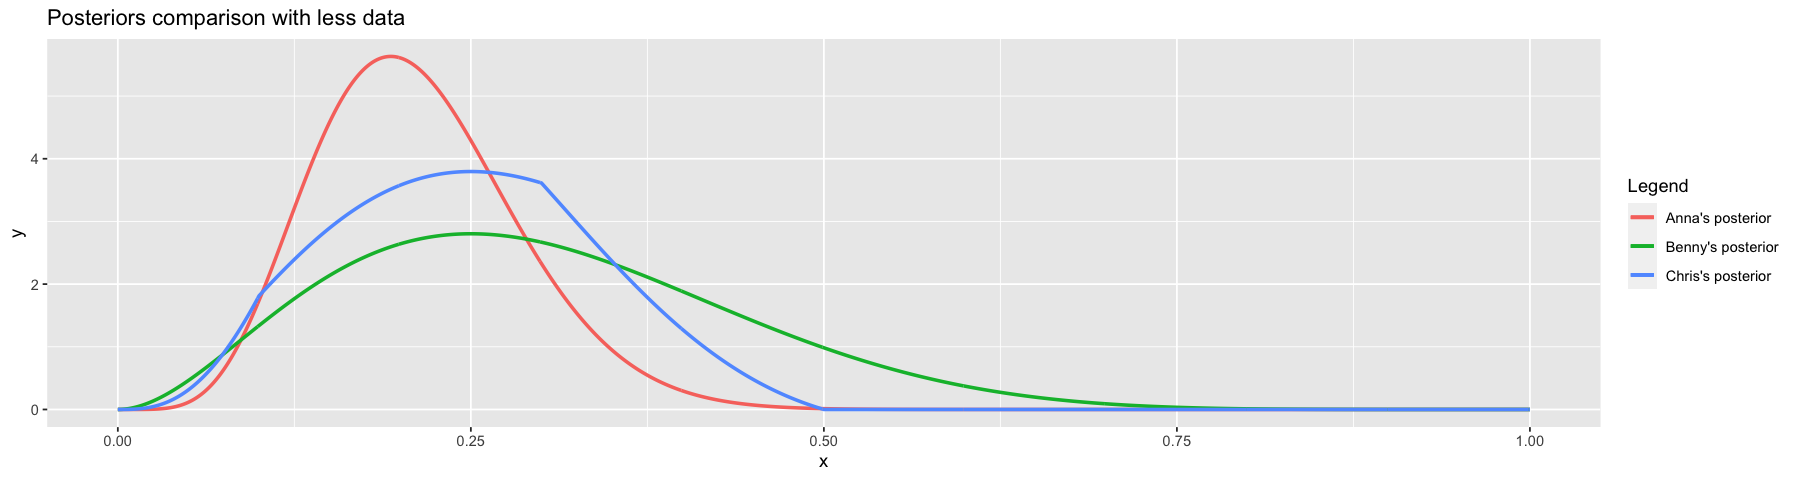

In [31]:
x <- seq(0,1,0.001)
mu <- 0.2
var <- 0.08^2

alpha <- ((1-mu)/var-1/mu)*mu^2
beta <- alpha*(1/mu-1)

trapez.post <- function(x){
    return((trapez(x)/0.7)*dbinom(2,8,x))
}

beta.post <- function(x){
    return(dbeta(x, alpha, beta)*dbinom(2,8,x))
}

unif.post <- function(x){
    return(dunif(x)*dbinom(2,8,x))
}

posteriors<-data.frame(x.axis=x,
                       anna.post=beta.post(x)/integrate(beta.post,lower=0,upper=1)$value,
                       benny.post=unif.post(x)/integrate(unif.post,lower=0,upper=1)$value,
                       chris.post=trapez.post(x)/integrate(trapez.post,lower=0,upper=1)$value
                       )    

posteriors<-data.frame(x.axis=x,
                       anna.post=beta.post(x)/integrate(beta.post,lower=0,upper=1)$value,
                       benny.post=unif.post(x)/integrate(unif.post,lower=0,upper=1)$value,
                       chris.post=trapez.post(x)/integrate(trapez.post,lower=0,upper=1)$value
                       )
options(repr.plot.width=15, repr.plot.height=4)

samples <- length(posteriors$anna.post)

anna.mp.value <- which.max(posteriors$anna.post)*(1/length(posteriors$anna.post))
benny.mp.value <- which.max(posteriors$benny.post)*(1/length(posteriors$benny.post))
chris.mp.value <- which.max(posteriors$chris.post)*(1/length(posteriors$chris.post))

ggplot(posteriors)+
    geom_line(aes(x=x.axis, y=anna.post,colour='Anna\'s posterior'), size=1)+
    geom_line(aes(x=x.axis, y=benny.post,colour='Benny\'s posterior'), size=1)+
    geom_line(aes(x=x.axis, y=chris.post, colour='Chris\'s posterior'), size=1)+
    ggtitle('Posteriors comparison with less data')+
    labs(x='x', y='y', colour='Legend')

## Exercise 3

The likelihood function I use in this process is the binomial distribution

In [32]:
tosses <- c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'H','T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H','T', 'H', 'H', 'H')
n.H <- sum(tosses=='H')
n.T <- sum(tosses=='T')
n.tot <- n.H + n.T

### A

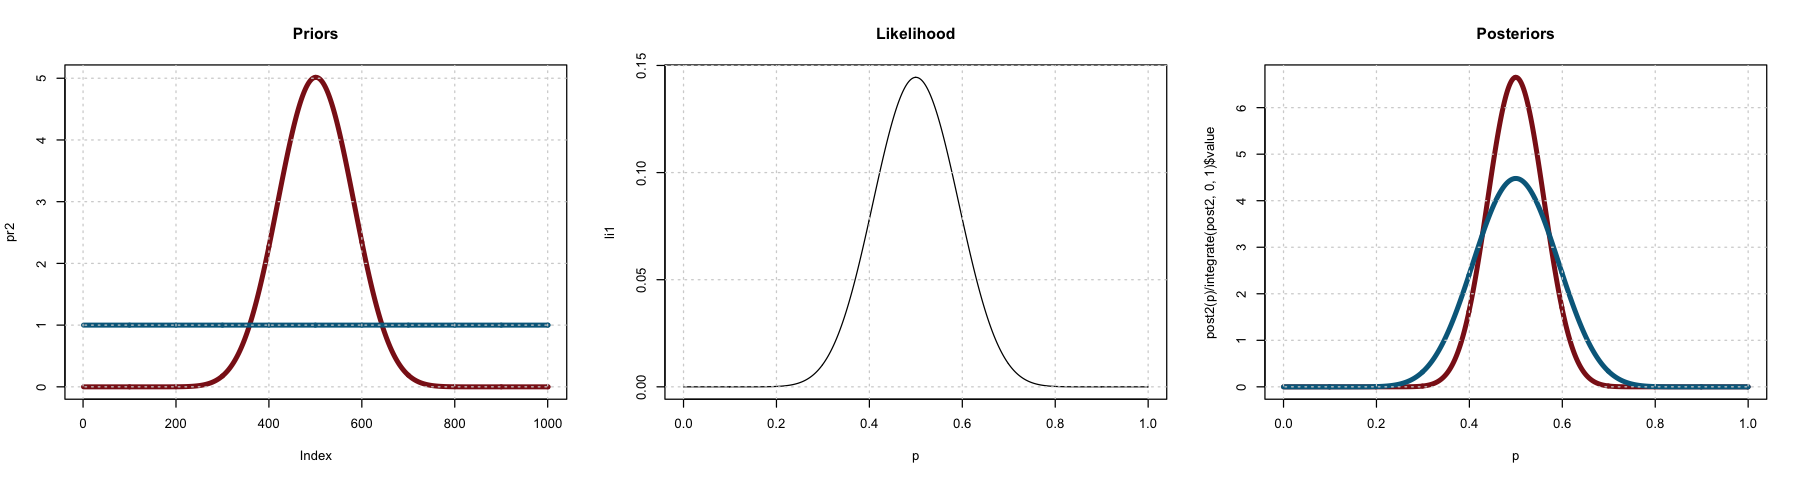

In [33]:
p <- seq(0,1,0.001)
li1<-dbinom(x=n.H, size=n.tot, prob=p)

#I use a beta(1,1) to avoid normalization
alpha1 = 1
beta1 = 1

alpha2 <- 20
beta2 <- 20

#priors
pr1<-dbeta(x=p, alpha1, beta1)
pr2<-dbeta(x=p, alpha2, beta2)

#posteriors
post1 <- function(p){
    return(dbeta(x=p, alpha1, beta1)*dbinom(x=n.H, size=n.tot, prob=p))
}
post2 <- function(p){
    return(dbeta(x=p, alpha2, beta2)*dbinom(x=n.H, size=n.tot, prob=p))
}
options(repr.plot.width=15, repr.plot.height=4)


par(mfrow = c(1, 3))
plot(pr2, type='l', main='Priors', col='firebrick4', lwd=4)
lines(pr1, type='l', col='deepskyblue4', lwd=4)
grid()
plot(p,li1, type='l', main='Likelihood')
grid()
plot(p,post2(p)/integrate(post2,0,1)$value, type='l', main='Posteriors', col='firebrick4', lwd=4)
lines(p,post1(p)/integrate(post1,0,1)$value, type='l', col='deepskyblue4', lwd=4)
grid()

### B

In [34]:
post1.values <- post1(p)/integrate(post1,0,1)$value
post1.mp.value <- which.max(post1.values)*(1/length(p))

post2.values <- post2(p)/integrate(post2,0,1)$value
post2.mp.value <- which.max(post2.values)*(1/length(p))

print(paste('Most probable with a uniform prior:', round(post1.mp.value,3)))
print(paste('Most probable with a beta prior:', round(post2.mp.value,3)))
print('=========================================================')

post1.area  <- (1/length(p))*cumsum(post1(p)/integrate(post1,0,1)$value)
post2.area  <- (1/length(p))*cumsum(post2(p)/integrate(post2,0,1)$value)

print(paste('95% credibility interval for a uniform prior:',paste0('[',credibility.95(post1.area)[1],',',credibility.95(post1.area)[2],']')))
print(paste('95% credibility interval for a Beta prior:',paste0('[',credibility.95(post2.area)[1],',',credibility.95(post2.area)[2],']')))

[1] "Most probable with a uniform prior: 0.5"
[1] "Most probable with a beta prior: 0.5"
[1] "========================================================="
[1] "95% credibility interval for a uniform prior: [0.3305,0.6705]"
[1] "95% credibility interval for a Beta prior: [0.3835,0.6165]"


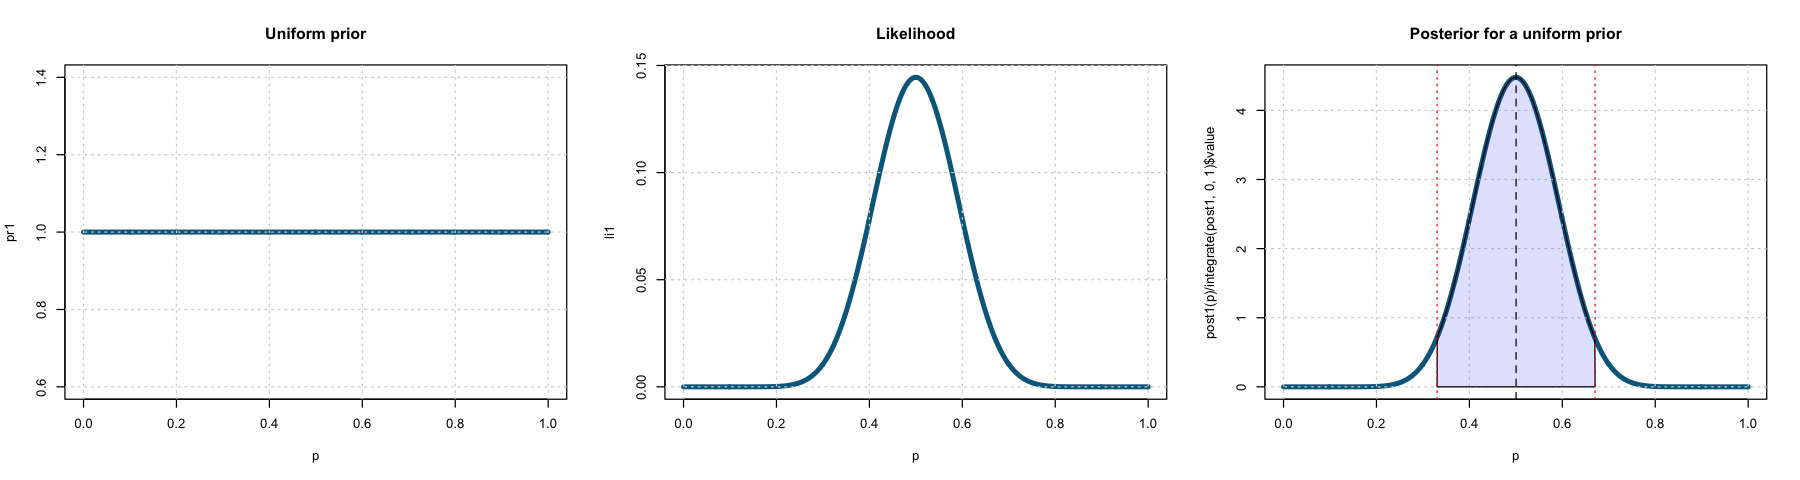

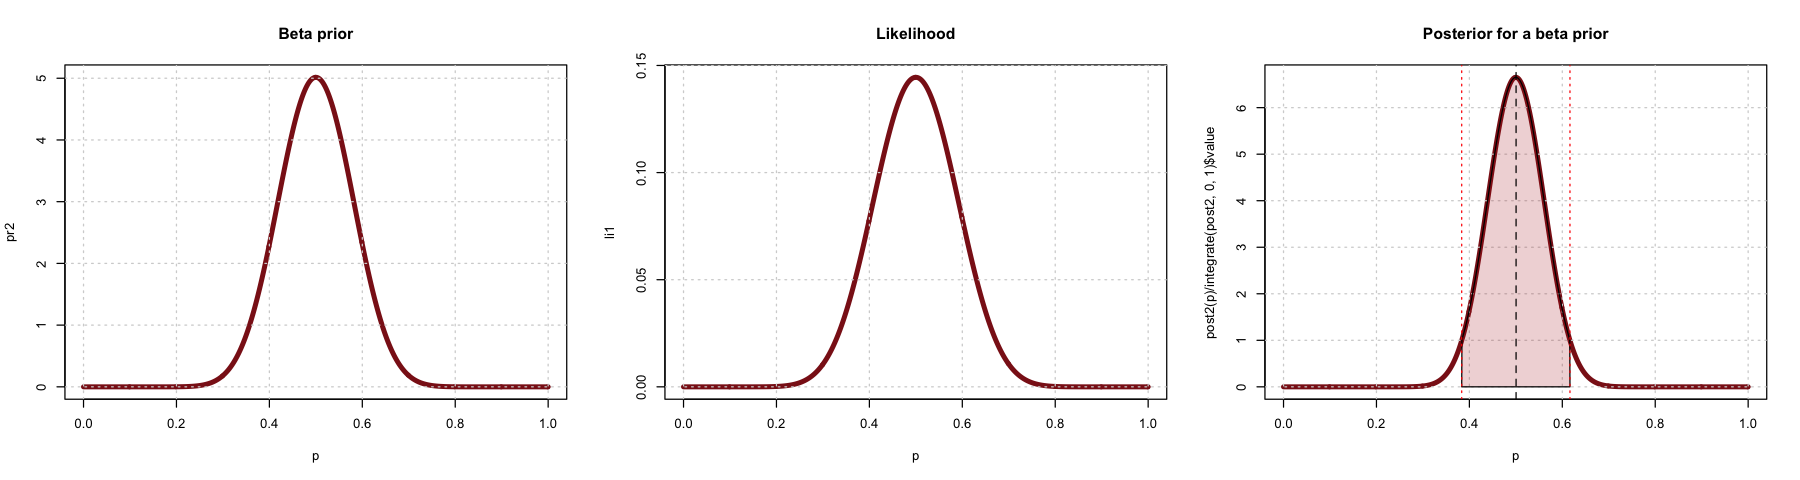

In [35]:
mycol <- rgb(0, 0, 139, max = 150, alpha = 20, names = "blue")
mycol2 <- rgb(70, 13, 13, max = 100, alpha = 20, names = "red")

par(mfrow = c(1, 3))
plot(p,pr1, type='l', main='Uniform prior', col='deepskyblue4', lwd=4)
grid()
plot(p,li1, type='l', main='Likelihood', col='deepskyblue4', lwd=4)
grid()
plot(p,post1(p)/integrate(post1,0,1)$value, main='Posterior for a uniform prior', type='l', col='deepskyblue4', lwd=4)
grid()

x <- c(credibility.95(post1.area)[1],p[p>credibility.95(post1.area)[1] & p<credibility.95(post1.area)[2]],credibility.95(post1.area)[2])
y <- c(0,post1.values[which(p>credibility.95(post1.area)[1] & p<credibility.95(post1.area)[2])],0)
polygon(x = x, y = y, col = mycol)

abline(v=post1.mp.value, lty=2,col='black')
abline(v=credibility.95(post1.area)[1], lty='dotted',col='red')
abline(v=credibility.95(post1.area)[2], lty='dotted',col='red')

plot(p,pr2, type='l', col='firebrick4', main='Beta prior', lwd=4)
grid()
plot(p,li1, type='l', main='Likelihood', col='firebrick4', lwd=4)
grid()
plot(p,post2(p)/integrate(post2,0,1)$value, main='Posterior for a beta prior', type='l', col='firebrick4', lwd=4)
grid()

x <- c(credibility.95(post2.area)[1],p[p>credibility.95(post2.area)[1] & p<credibility.95(post2.area)[2]],credibility.95(post2.area)[2])
y <- c(0,post2.values[which(p>credibility.95(post2.area)[1] & p<credibility.95(post2.area)[2])],0)
polygon(x = x, y = y, col = mycol2)

abline(v=post2.mp.value, lty=2,col='black')
abline(v=credibility.95(post2.area)[1], lty='dotted',col='red')
abline(v=credibility.95(post2.area)[2], lty='dotted',col='red')

### C

In [36]:
n.H.temp <- 0
n.T.temp <- 0
p <- seq(0,1,0.001)
n <-1

unif.mp.values <- c(NULL)
beta.mp.values <- c(NULL)
unif.low.ci.values <- c(NULL)
beta.low.ci.values <- c(NULL)
unif.high.ci.values <- c(NULL)
beta.high.ci.values <- c(NULL)

for (toss in tosses){
    if (toss=='H'){
        n.H.temp<-n.H.temp+1        
    }
    if(n<=30){
    p.post1 <- dbeta(x=p, alpha1+n.H.temp, alpha1+n-n.H.temp)
    p.post2 <- dbeta(x=p, alpha2+n.H.temp, alpha2+n-n.H.temp)
    
    area.post1  <- cumsum(p.post1)*(1/length(p))
    area.post2  <- cumsum(p.post2)*(1/length(p))

    unif.mp.values<-c(unif.mp.values, which.max(p.post1)*(1/length(p)))
    beta.mp.values<-c(beta.mp.values,which.max(p.post2)*(1/length(p)))
    
    unif.low.ci.values <- c(unif.low.ci.values,credibility.95(area.post1)[1])
    beta.low.ci.values <- c(beta.low.ci.values,credibility.95(area.post2)[1])
    
    unif.high.ci.values <- c(unif.high.ci.values,credibility.95(area.post1)[2])
    beta.high.ci.values <- c(beta.high.ci.values,credibility.95(area.post2)[2])   
    }

    n<-n+1

}

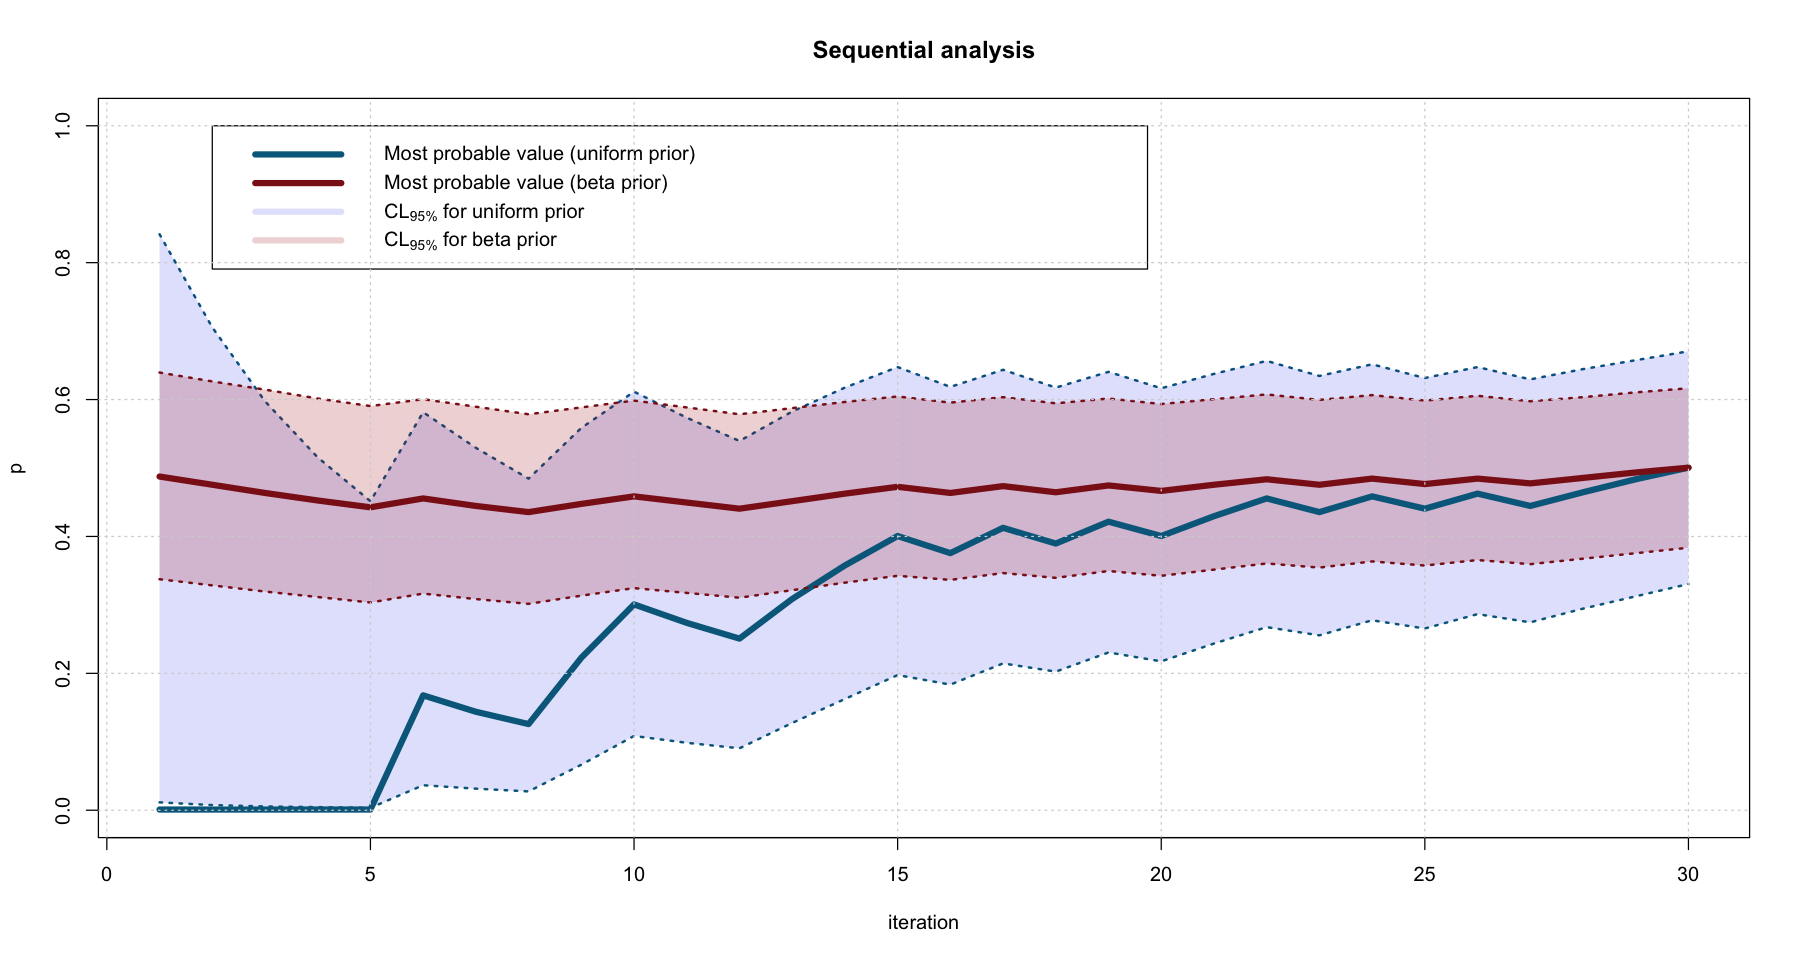

In [37]:
options(repr.plot.width=15, repr.plot.height=8)

x =1:30
plot(1:length(unif.high.ci.values), unif.high.ci.values, type='l',ylim=c(0,1), col='deepskyblue4', xlab='iteration',ylab='p',  lty='dotted', lwd=2, main='Sequential analysis')
polygon(x=c(x,rev(x)), y=c(unif.high.ci.values, rev(unif.low.ci.values)),col = mycol, border = NA)
polygon(x=c(x,rev(x)), y=c(beta.high.ci.values, rev(beta.low.ci.values)),col = mycol2, border = NA)
lines(1:length(unif.mp.values), unif.mp.values, type='l', col='deepskyblue4', lwd=5)
lines(1:length(unif.low.ci.values), unif.low.ci.values, type='l', col='deepskyblue4', lty='dotted', lwd=2)
lines(1:length(beta.high.ci.values), beta.high.ci.values, type='l',ylim=c(0,1), col='firebrick4', lty='dotted', lwd=2)
lines(1:length(beta.mp.values), beta.mp.values, type='l', col='firebrick4', lwd=5)
lines(1:length(beta.low.ci.values), beta.low.ci.values, type='l', col='firebrick4', lty='dotted', lwd=2)
legend(2, 1,
       legend=c("Most probable value (uniform prior)",
                "Most probable value (beta prior)",
                expression(paste("CL"["95%"], " for uniform prior")),
                expression(paste("CL"["95%"], " for beta prior"))),
       col=c("deepskyblue4",
             "firebrick4",
             mycol,
             mycol2),
       lty=1:1,lwd=5:5)
grid()

This is a beautiful example of how Bayesian inference works. We have a process with the same likelihood and with two different a priori knowledge expressed by two different priors. In the blue case, with a less informative (uniform prior) we can see clearly how the strength of the observations pulls up the most probable value, while in the case of a very informative prior (beta) the observations are simply confirming the a priori knowledge we have on the underlying process. In the end, exactly at the last observation (30), the two most probable values are matching, meaning that the prior's choice is not anymore important. This phenomena has been observed also above, in the first exercise! 

### D

In [39]:
print('========================ALL DATA TOGETHER========================')
print(paste('Most probable with a uniform prior:', round(post1.mp.value,3)))
print(paste('Most probable with a beta prior:', round(post2.mp.value,3)))
print('_________________________________________________________________')
print(paste('95% credibility interval for a uniform prior:',paste0('[',credibility.95(post1.area)[1],',',credibility.95(post1.area)[2],']')))
print(paste('95% credibility interval for a Beta prior:',paste0('[',credibility.95(post2.area)[1],',',credibility.95(post2.area)[2],']')))
print('=======================SEQUENTIAL ANALYSIS=======================')
print(paste('Most probable with a uniform prior:', round(tail(unif.mp.values, n=1),3)))
print(paste('Most probable with a beta prior:', round(tail(beta.mp.values, n=1),3)))
print('_________________________________________________________________')
print(paste('95% credibility interval for a uniform prior:',paste0('[',tail(unif.low.ci.values, n=1),',',tail(unif.high.ci.values, n=1),']')))
print(paste('95% credibility interval for a Beta prior:',paste0('[',tail(beta.low.ci.values, n=1),',',tail(beta.high.ci.values, n=1),']')))


[1] "========================ALL DATA TOGETHER========================"
[1] "Most probable with a uniform prior: 0.5"
[1] "Most probable with a beta prior: 0.5"
[1] "_________________________________________________________________"
[1] "95% credibility interval for a uniform prior: [0.3305,0.6705]"
[1] "95% credibility interval for a Beta prior: [0.3835,0.6165]"
[1] "=======================SEQUENTIAL ANALYSIS======================="
[1] "Most probable with a uniform prior: 0.5"
[1] "Most probable with a beta prior: 0.5"
[1] "_________________________________________________________________"
[1] "95% credibility interval for a uniform prior: [0.3305,0.6705]"
[1] "95% credibility interval for a Beta prior: [0.3835,0.6165]"


Not surprisingly, since each coint toss is independent on the previous one, I obtain exactly the same results. The big difference is that in the sequential analysis we can see how the posterior distribution changes for each toss.